In [10]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import preprocessing

In [11]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [12]:
print(data)

       6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0      5  0    0    0    0    0  ...      0      0      0      0      0      0
1      7  0    0    0    0    0  ...      0      0      0      0      0      0
2      9  0    0    0    0    0  ...      0      0      0      0      0      0
3      5  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
19994  0  0    0    0    0    0  ...      0      0      0      0      0      0
19995  1  0    0    0    0    0  ...      0      0      0      0      0      0
19996  2  0    0    0    0    0  ...      0      0      0      0      0      0
19997  9  0    0    0    0    0  ...      0      0      0      0      0      0
19998  5  0    0    0    0    0  ...      0      0      0      0      0      0

[19999 rows x 785 columns]


In [13]:
y=data.iloc[:,:1].values

In [14]:
y

array([[5],
       [7],
       [9],
       ...,
       [2],
       [9],
       [5]])

In [15]:
X=data.iloc[:,1:].values

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X_max, X_min = X.max(), X.min()
X = (X - X_min)/(X_max - X_min)

In [18]:
m=X.shape[0] #rows
n=X.shape[1] #columns

In [19]:
ones=np.ones((m,1))

In [20]:
X=np.concatenate((ones,X),axis=1)

In [21]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
def costfn_and_grad_descent(X,y,alpha,max_iter):  #alpha is learning rate
   cost=np.random.randn(max_iter)
   Theta=np.random.randn(n+1) #initial weight vector
   h=np.dot(X_train, Theta) #hypothesis
   for i in range(0,max_iter):
      for j in range(0,n):
        Theta[j]=Theta[j]-(alpha/X_train.shape[0])*(np.dot(sum(h-y_train),X_train[:,j]))
      h=np.dot(X_train,Theta)
      t=np.dot(X_test,Theta)
      cost[i]=(1/(2*X_test.shape[0]))*(np.sum(np.square((t-y_test))))
   return cost, Theta


In [25]:
cost,Theta =costfn_and_grad_descent(X,y,0.00000000000000001,50)

In [26]:
print(cost)

[110791.28562969 110791.28562942 110791.28562915 110791.28562888
 110791.28562862 110791.28562835 110791.28562808 110791.28562781
 110791.28562755 110791.28562728 110791.28562701 110791.28562674
 110791.28562647 110791.28562621 110791.28562594 110791.28562567
 110791.2856254  110791.28562514 110791.28562487 110791.2856246
 110791.28562433 110791.28562407 110791.2856238  110791.28562353
 110791.28562326 110791.28562299 110791.28562273 110791.28562246
 110791.28562219 110791.28562192 110791.28562166 110791.28562139
 110791.28562112 110791.28562085 110791.28562059 110791.28562032
 110791.28562005 110791.28561978 110791.28561952 110791.28561925
 110791.28561898 110791.28561871 110791.28561844 110791.28561818
 110791.28561791 110791.28561764 110791.28561737 110791.28561711
 110791.28561684 110791.28561657]


In [27]:
print(Theta)

[ 6.86853851e-01 -8.69779804e-01 -1.29985860e+00  1.03559666e+00
 -7.45401577e-02 -4.35046905e-01 -2.22446622e-01  1.24768595e+00
  1.28278370e+00 -2.69199841e+00 -6.50289122e-01  2.07646777e+00
 -1.47631286e-01 -6.24508621e-01  1.12546062e+00 -4.31855419e-02
  1.24397834e+00 -1.89371476e+00 -1.03279911e+00 -2.43504632e+00
  1.99391506e-01 -2.10240397e+00  1.19817395e+00 -6.76303487e-01
 -4.05565632e-01 -3.63832576e-01  5.05031710e-01  7.31266901e-02
 -2.51247205e-01  1.27829123e+00 -1.49515673e+00  1.35668395e+00
 -7.95279788e-01  8.16165643e-01 -7.19322489e-01 -4.16930174e-01
 -9.46923562e-01 -1.42596150e+00  1.11943987e-01  4.91243610e-01
  5.52494896e-01 -5.25378299e-01 -1.88025304e+00 -6.65812510e-01
  4.93359088e-01  1.57579704e+00  1.32211306e+00  6.09819941e-01
  6.07728730e-03 -3.72189623e-01 -1.68726035e+00 -4.12274997e-01
 -2.24561922e-01  1.13424377e+00  2.21488618e-01 -3.12753235e+00
 -8.13947539e-01  8.66895134e-01 -1.48077580e+00  5.36435636e-01
 -2.60122385e-01 -6.42445

In [28]:
iteration=np.array(range(1,51))

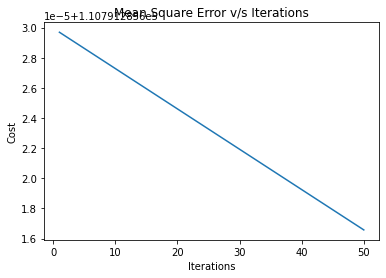

In [29]:
plt.plot(iteration,cost)
plt.title("Mean Square Error v/s Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()